In [2]:
require(vegan)
require(MASS)ls

require(hypervolume)
source("00_hv_functions.R")

Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: MASS
Loading required package: hypervolume
Loading required package: Rcpp
Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”

In [3]:
df = read.csv("../Results/trees_family_matrix.csv", row.names=1)

In [4]:
df[is.na(df)] = 0
# df = apply(df, 1, function(x) x/sum(x)) # dont think i want relative as it makes all plots seem the same in terms of overall...

In [5]:
df.pca = rda(df)

In [6]:
df.pca

Call: rda(X = df)

              Inertia Rank
Total           47.74     
Unconstrained   47.74   70
Inertia is variance 

Eigenvalues for unconstrained axes:
   PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8 
15.632 13.671  3.588  1.941  1.370  1.308  1.171  1.057 
(Showed only 8 of all 70 unconstrained eigenvalues)


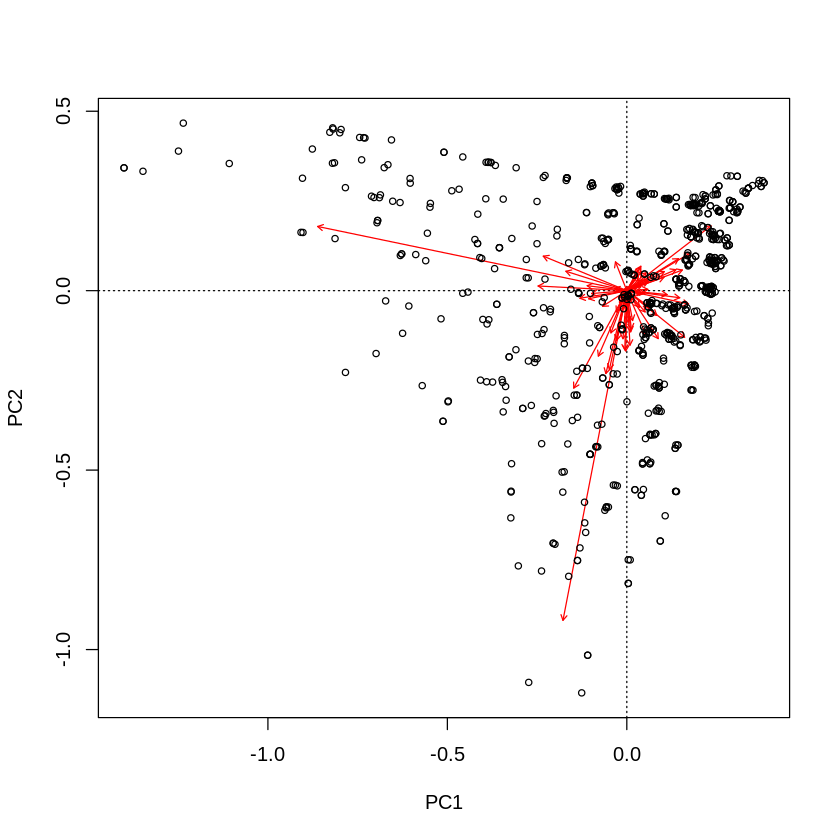

In [7]:
biplot(df.pca, scaling = -1)

In [8]:
print(df.pca$CA$eig[1]/df.pca$tot.chi)
print(df.pca$CA$eig[2]/df.pca$tot.chi)
print(df.pca$CA$eig[3]/df.pca$tot.chi)
print(df.pca$CA$eig[4]/df.pca$tot.chi)
print(df.pca$CA$eig[5]/df.pca$tot.chi)
print(df.pca$CA$eig[6]/df.pca$tot.chi)

      PC1 
0.3274607 
      PC2 
0.2863907 
       PC3 
0.07516494 
       PC4 
0.04066093 
       PC5 
0.02869382 
       PC6 
0.02739009 


In [9]:
axis = df.pca$CA$u
axis = as.data.frame(axis)

axis$plot    = unlist(strsplit(rownames(axis), "_"))[ c(T,F,F)]
axis$subplot = unlist(strsplit(rownames(axis), "_"))[ c(F,T,F)]
axis$census  = unlist(strsplit(rownames(axis), "_"))[ c(F,F,T)]

In [10]:
df = axis

[1] "BNorth" "BSouth" "Belian" "DC1"    "DC2"    "E"      "LF"     "Seraya"
[9] "Tower"

In [175]:
test = function(df){
    
    hvlist = list()
    
    plot.list   = unique(df$plot)
    census.list = unique(df$census)
    
    for (p in plot.list){
        for (c in census.list){
            
            tmp = subset(df, plot == p & census == c, select = c("PC1", "PC2", "PC3"))
            
            if (nrow(tmp) == 0){
                
                hv = new("empty_hv", Name = paste0(p, "_", c), centroid = NA, volume = NA, shape = NA)
                
            } else{
            
                hv = hypervolume_gaussian(tmp, name = paste0(p, "_", c), verbose = FALSE)
            }
            
            hvlist[[paste0(p, "_", c)]] = hv

        }
    }
    
    #hvlist <- new("HypervolumeList", HVList = hvlist)
    return(hvlist)
}

hvlist = test(df)

In [177]:
names = c()
for (p in unique(df$plot)){ for (c in unique(df$census)){
    names = c(names, paste0(p, "_", c))
}}

rslts           = data.frame(matrix(NA, nrow = length(names), ncol = 6))
colnames(rslts) = c("plot", "census", "AGB", "centroid", "volume", "shape")
rownames(rslts) = names


for (i in names){
    hv = hvlist[[i]]
    
    rslt$plot[i]     = unlist(strsplit(i, "_"))[1]
    rslt$census[i]   = unlist(strsplit(i, "_"))[2]
    
    if (class(hv) == "Hypervolume"){
        
        rslt$centroid[i] = get_centroid(hv)
        rslt$volume[i]   = hv@Volume
    
    } else {
        
        rslt$centroid[i] = NA
        rslt$volume[i]   = NA
    
    }
}

ERROR: Error in `$<-.data.frame`(`*tmp*`, "plot", value = structure(c("BNorth", : replacement has 37 rows, data has 36


In [149]:
rslt = data.frame()
colnames(rslts) = c("plot", "census", "AGB", "centroid", "volume", "shape")

In [151]:
df = axis

In [162]:
rslt = data.frame(col.names = c("plot", "census", "AGB", "centroid", "volume", "shape"), row.names = names)

ERROR: Error in data.frame(col.names = c("plot", "census", "AGB", "centroid", : row names supplied are of the wrong length


In [174]:
length(hvlist)

[1] 36